# Feature Extraction

In [5]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [6]:
def plot_diff(imgs,titles):
    n = len(imgs)
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(imgs[i],cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

## Scale Invariant Feature Transformation (SIFT)

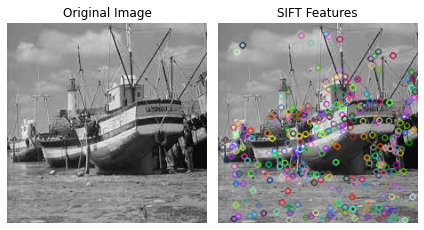

In [9]:
img = plt.imread('imgs/ship.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img2 = img.copy()
img2=cv2.drawKeypoints(gray,kp,img2)

plot_diff([img,img2],["Original Image","SIFT Features"])

## ORB( Oriented FAST and Rotated BRIEF) 


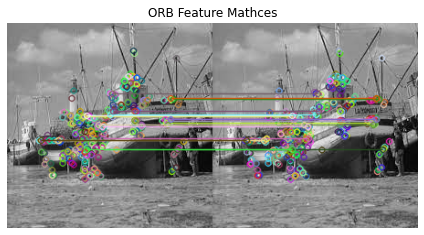

In [12]:
import numpy as np 
import cv2 
  
query_img = cv2.imread('imgs/ship.jpg') 
train_img = cv2.imread('imgs/ship.jpg') 
 
# Convert it to grayscale 
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Now detect the keypoints and compute the descriptors for the query image  and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
 
# Initialize the Matcher for matching the keypoints and then match the # keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
 
# draw the matches to the final image containing both the images the drawMatches() function 
#takes both images and keypoints and outputs the matched query image with its train image 

final_img = cv2.drawMatches(
    query_img, queryKeypoints, 
    train_img, trainKeypoints, 
    matches[:20],None
) 

plot_diff([final_img],["ORB Feature Mathces"])